# Granger Causality Analysis between Twitter Sentiment, Reddit Sentiment, Google Trends and Bitcoin Prices

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def plot_bitcoin_price(data,col,bitcoin,name):
  '''
  Plots the time series "data" and the corresponding bitcoin price  for that day
  Input:
    data: the dataframe to be plotted
    col: the column name of the data to be plotted
    bitcoin: dataframe with bitcoin price 
    name: Label for the figure
  '''
  fig,ax = plt.subplots(figsize=(10, 8), dpi=80)
  # make a plot
  ax.plot(bitcoin['Date'], bitcoin['open'], color="palevioletred")
  # set x-axis label
  ax.set_xlabel("Date",fontsize=14)
  # set y-axis label
  ax.set_ylabel("Bitcoin Price Difference",color="palevioletred",fontsize=14)

  # twin object for two different y-axis on the sample plot
  ax2=ax.twinx()
  # make a plot with different y-axis using second axis object
  ax2.plot(data['date'], data[col],color="cadetblue")
  ax2.set_ylabel(name,color="cadetblue",fontsize=14)
  ax.set_xticklabels([])
  plt.show()  

In [ ]:
def plot_bitcoin_diff(data,col,bitcoin,name):
  '''
  Plots the time series "data" and the corresponding bitcoin price difference for that day
  Input:
    data: the dataframe to be plotted
    col: the column name of the data to be plotted
    bitcoin: dataframe with bitcoin price difference
    name: Label for the figure
  '''
  fig,ax = plt.subplots(figsize=(10, 8), dpi=80)
  # make a plot
  ax.plot(bitcoin['Date'], bitcoin['Diff_Open'], color="palevioletred")
  # set x-axis label
  ax.set_xlabel("Date",fontsize=14)
  # set y-axis label
  ax.set_ylabel("Bitcoin Price Difference",color="palevioletred",fontsize=14)

  # twin object for two different y-axis on the sample plot
  ax2=ax.twinx()
  # make a plot with different y-axis using second axis object
  ax2.plot(data['date'], data[col],color="cadetblue")
  ax2.set_ylabel(name,color="cadetblue",fontsize=14)
  ax.set_xticklabels([])
  plt.show()  

In [ ]:
#Reference: https://towardsdatascience.com/a-quick-introduction-on-granger-causality-testing-for-time-series-analysis-7113dc9420d2
maxlag=15
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):   
  '''
  Performs Granger Causation Analysis, to get the causation matrix
  Inputs:
        data: a dataframe consisting of the STATIONARY timeseries that we want to analyse
        variable: names of columns from "data" that we are performing the causality analysis on 
  Outputs: a causation matrix
          The row are the response (y) and the columns are the predictors (x). 
          If a given p-value is < significance level (0.05), we can reject the null hypothesis and conclude that column_x Granger causes column_y.
  ''' 
   
  df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
  for c in df.columns:
    for r in df.index:
      test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
      p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
      if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
      min_p_value = np.min(p_values)
      df.loc[r, c] = min_p_value
  df.columns = [var + '_x' for var in variables]
  df.index = [var + '_y' for var in variables]
  return df

In [ ]:
#Reference: https://www.analyticsvidhya.com/blog/2021/08/granger-causality-in-time-series-explained-using-chicken-and-egg-problem/
def check_stationary(timeseries):
  '''
  Checks if a timeseries is stationary or not-- Granger Causality CAN ONLY be performed on stationary timeseries
  '''
  result = adfuller(timeseries)
  print(f'Test Statistics: {result[0]}')
  print(f'p-value: {result[1]}')
  print(f'critical_values: {result[4]}')

  if result[1] > 0.05:
    print("Series is not stationary")
  else:
    print("Series is stationary")

## Google Trends

In [ ]:
bitcoin = pd.read_csv('categorical_bitcoin_price.csv', sep='\t', index_col=0)
google =pd.read_csv('trends_daily_score.csv', sep='\t', index_col=0)

In [ ]:
bitcoin.head()

,Date,open,high,low,close,volume,Diff_Open,Diff_Category
0,2021-01-01,28923.63,29600.00,28624.57,29331.69,54182.925011,NaN,0
1,2021-01-02,29331.70,33300.00,28946.53,32178.33,129993.873362,408.07,0
2,2021-01-03,32176.45,34778.11,31962.99,33000.05,120957.566750,2844.75,1
3,2021-01-04,33000.05,33600.00,28130.00,31988.71,140899.885690,823.60,1
4,2021-01-05,31989.75,34360.00,29900.00,33949.53,116049.997038,-1010.30,-1


In [ ]:
google.head()

,date,avg_score,weighted_score
0,2021-01-01,12.660625,14.447561
1,2021-01-02,34.144375,37.360744
2,2021-01-03,48.853125,53.128124
3,2021-01-04,32.544375,35.352064
4,2021-01-05,24.341250,26.472194


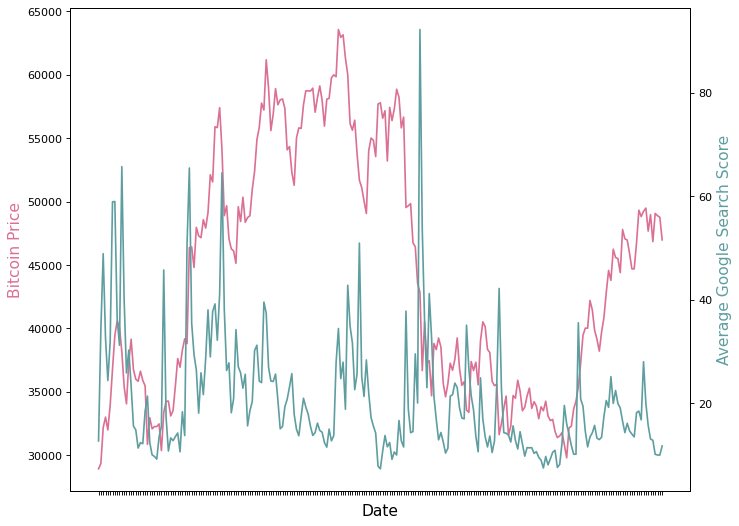

In [ ]:
plot_bitcoin_price(google,'avg_score', bitcoin, name="Average Google Search Score")

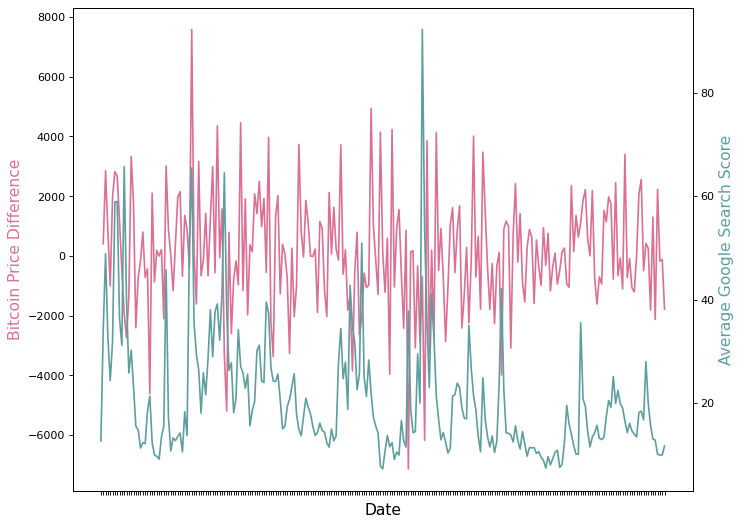

In [ ]:
plot_bitcoin_diff(google,'avg_score', bitcoin, name="Average Google Search Score")

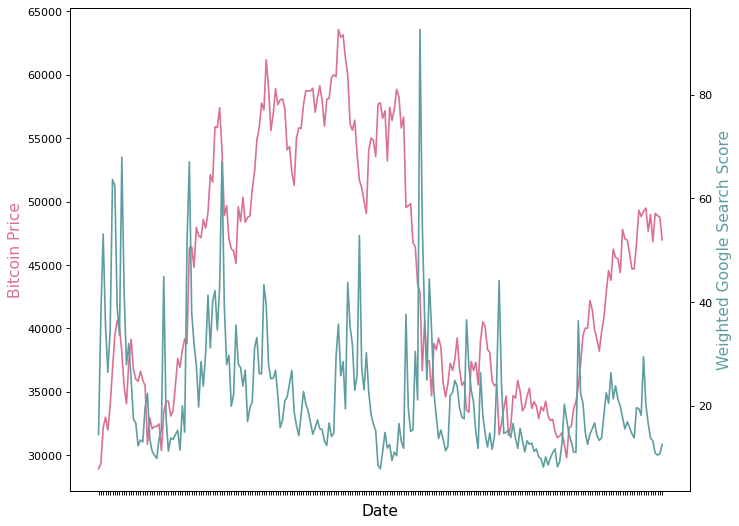

In [ ]:
plot_bitcoin_price(google,'weighted_score', bitcoin, name="Weighted Google Search Score")

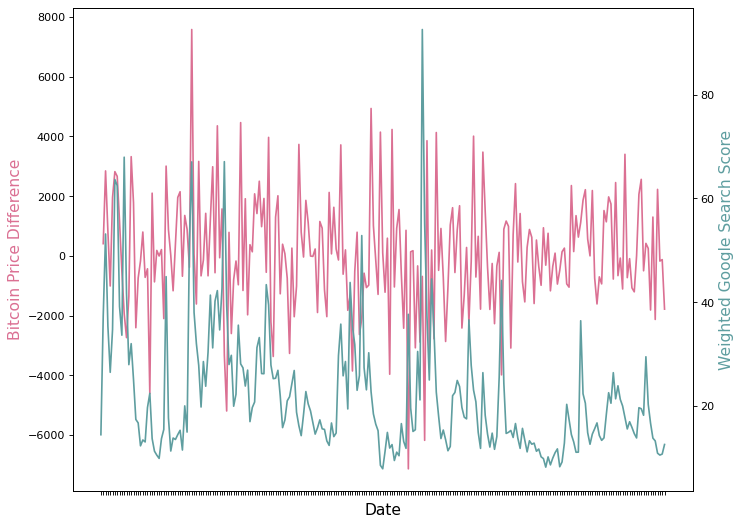

In [ ]:
plot_bitcoin_diff(google,'weighted_score', bitcoin, name="Weighted Google Search Score")

Granger Causality is only carried out on stationary time series. Finding th difference will make it stationary

Reference: https://www.analyticsvidhya.com/blog/2021/08/granger-causality-in-time-series-explained-using-chicken-and-egg-problem/

In [ ]:
check_stationary(google['avg_score'])

Test Statistics: -7.63547623573123
p-value: 1.9576675387808164e-11
critical_values: {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}
Series is stationary


In [ ]:
check_stationary(google['weighted_score'])

Test Statistics: -7.435194689457
p-value: 6.209898339028594e-11
critical_values: {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}
Series is stationary


In [ ]:
check_stationary(bitcoin['open'])

Test Statistics: -1.825793411804055
p-value: 0.3677332429247039
critical_values: {'1%': -3.4578942529658563, '5%': -2.8736593200231484, '10%': -2.573228767361111}
Series is not stationary


In [ ]:
check_stationary(bitcoin['Diff_Open'].dropna())

Test Statistics: -10.554298525888205
p-value: 8.026227643475927e-19
critical_values: {'1%': -3.4578942529658563, '5%': -2.8736593200231484, '10%': -2.573228767361111}
Series is stationary


Performing Granger Analysis

In [ ]:
granger_df = pd.DataFrame()
#We need difference in bitcoin price (granger causality can only be calculated on stationary data)
granger_df['Bitcoin_Diff_Open'] = bitcoin['Diff_Open']
granger_df['Google_Search_Avg'] = google['avg_score']
granger_df['Google_Search_Weighted'] = google['weighted_score']
#drop NAN columns
granger_df = granger_df.dropna()
granger_df.head()

,Bitcoin_Diff_Open,Google_Search_Avg,Google_Search_Weighted
1,408.07,34.144375,37.360744
2,2844.75,48.853125,53.128124
3,823.60,32.544375,35.352064
4,-1010.30,24.341250,26.472194
5,1959.78,31.816250,34.715996


In [ ]:
# Granger Causality between the bitcoin prices and google search trends
grangers_causation_matrix(granger_df, variables = granger_df.columns)

,Bitcoin_Diff_Open_x,Google_Search_Avg_x,Google_Search_Weighted_x
Bitcoin_Diff_Open_y,1.0000,0.0420,0.0502
Google_Search_Avg_y,0.0429,1.0000,0.0136
Google_Search_Weighted_y,0.0423,0.0159,1.0000


The row are the response (y) and the columns are the predictors (x). If a given p-value is < significance level (0.05), we can reject the null hypothesis and conclude that metric_x Granger causes metric_y. 

**We can hence conclude that Average Google Search Trends granger causes Bitcoin Prices, while using the weighted google search score does not granger cause bitcoin price changes**

Thus, in all further analysis, we use the Average Google Search Score Metric


## Reddit Sentiment

In [ ]:
reddit = pd.read_csv('redditDailySentiment.csv', sep='\t', index_col=None)
bitcoin = pd.read_csv('categorical_bitcoin_price.csv', sep='\t', index_col=0)

In [ ]:
reddit.head()

,Day,neg,neu,pos,compound
0,2021-01-01,0.052390,0.771753,0.172513,0.238452
1,2021-01-02,0.057414,0.811156,0.121446,0.135624
2,2021-01-03,0.063241,0.783810,0.148659,0.152421
3,2021-01-04,0.061042,0.815152,0.121297,0.167221
4,2021-01-05,0.061790,0.801428,0.135118,0.147205


In [ ]:
reddit = reddit.rename(columns={'Day': 'date'})

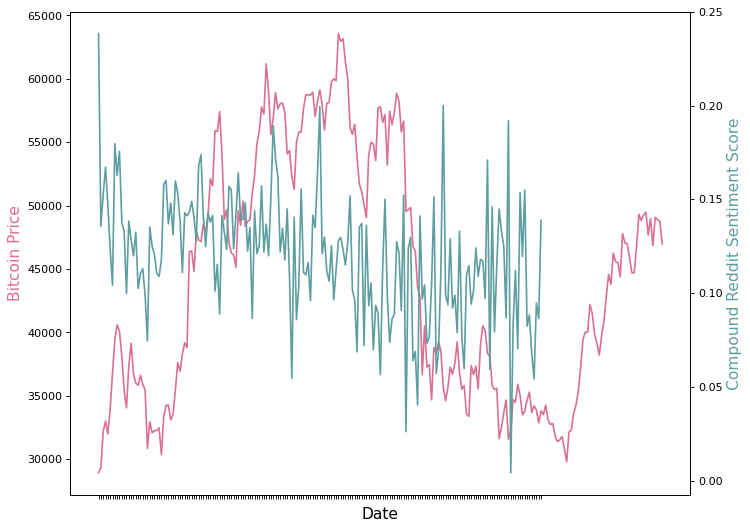

In [ ]:
plot_bitcoin_price(reddit,'compound', bitcoin, name="Compound Reddit Sentiment Score")

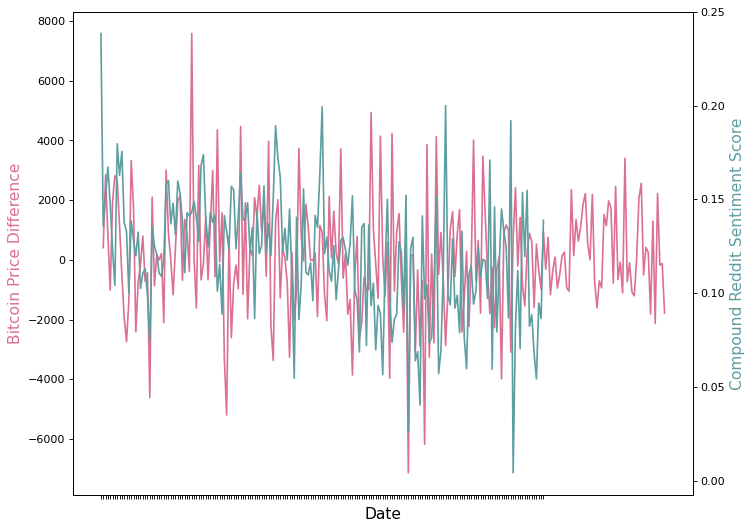

In [ ]:
plot_bitcoin_diff(reddit,'compound', bitcoin, name="Compound Reddit Sentiment Score")

Granger Analysis

In [ ]:
#Check if reddit sentiment is staionary
check_stationary(reddit['compound'])

Test Statistics: -2.8222020579459715
p-value: 0.05517167952135924
critical_values: {'1%': -3.466398230774071, '5%': -2.8773796387256514, '10%': -2.575213838610586}
Series is not stationary


In [ ]:
reddit_normalised = reddit['compound'].diff().dropna()

In [ ]:
check_stationary(reddit_normalised)

Test Statistics: -5.9287405705394685
p-value: 2.4086913786249146e-07
critical_values: {'1%': -3.4682803641749267, '5%': -2.8782017240816327, '10%': -2.5756525795918366}
Series is stationary


In [ ]:
granger_df = pd.DataFrame()
#We need difference in bitcoin price and difference in reddit sentiment (granger causality can only be calculated on stationary data)
granger_df['Bitcoin_Diff_Open'] = bitcoin['Diff_Open']
granger_df['Reddit_Sentiment'] = reddit_normalised
#drop NAN columns
granger_df = granger_df.dropna()
granger_df.head()

,Bitcoin_Diff_Open,Reddit_Sentiment
1,408.07,-0.102828
2,2844.75,0.016797
3,823.60,0.014800
4,-1010.30,-0.020017
5,1959.78,-0.024147


In [ ]:
# Granger Causality between the bitcoin prices and reddit sentiment
grangers_causation_matrix(granger_df, variables = granger_df.columns)

,Bitcoin_Diff_Open_x,Reddit_Sentiment_x
Bitcoin_Diff_Open_y,1.0000,0.2147
Reddit_Sentiment_y,0.5841,1.0000


The row are the response (y) and the columns are the predictors (x). If a given p-value is < significance level (0.05), we can reject the null hypothesis and conclude that metric_x Granger causes metric_y. 

**We can hence conclude that Average Reddit Sentiment does not granger cause Bitcoin Prices**

## Twitter Sentiment

In [ ]:
twitter = pd.read_csv('twitterSentiment.csv', sep=',', index_col=None)
bitcoin = pd.read_csv('categorical_bitcoin_price.csv', sep='\t', index_col=0)

In [ ]:
twitter.tail(10)

,Day,neg,neu,pos,compound
93,2021-11-19,0.031968,0.863364,0.104666,0.234105
94,"['Airdrop',",0.000000,1.000000,0.000000,0.000000
95,['Bitcoin'],0.000000,1.000000,0.000000,0.000000
96,"['ETH',",0.000000,1.000000,0.000000,0.000000
97,"['PW',",0.000000,1.000000,0.000000,0.000000
98,"['YieldFarming',",0.000000,1.000000,0.000000,0.000000
99,['bitcoin'],0.000000,1.000000,0.000000,0.000000
100,['btc'],0.000000,1.000000,0.000000,0.000000
101,"['cryptocurrency',",0.000000,1.000000,0.000000,0.000000
102,"['cryptotrading',",0.000000,1.000000,0.000000,0.000000


In [ ]:
twitter = twitter.iloc[:94,:]
twitter.tail()

,Day,neg,neu,pos,compound
89,2021-11-06,0.021347,0.863014,0.115644,0.288571
90,2021-11-11,0.027035,0.863960,0.108999,0.256410
91,2021-11-12,0.028862,0.855401,0.115745,0.273526
92,2021-11-18,0.032186,0.868216,0.099597,0.208598
93,2021-11-19,0.031968,0.863364,0.104666,0.234105


In [ ]:
twitter = twitter.rename(columns={'Day': 'date'})

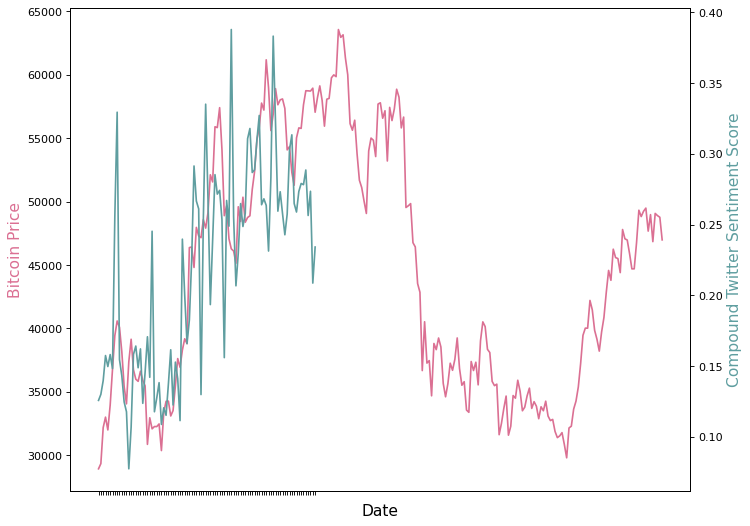

In [ ]:
plot_bitcoin_price(twitter,'compound', bitcoin, name="Compound Twitter Sentiment Score")

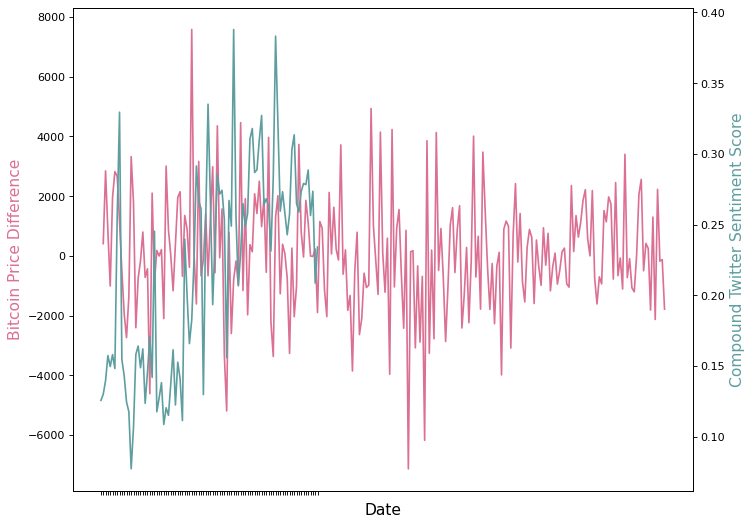

In [ ]:
plot_bitcoin_diff(twitter,'compound', bitcoin, name="Compound Twitter Sentiment Score")

Granger Analysis

In [ ]:
#Check if twitter sentiment is staionary
check_stationary(twitter['compound'])

Test Statistics: -1.9773721772300248
p-value: 0.2965818813755998
critical_values: {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}
Series is not stationary


In [ ]:
twitter_normalised = twitter['compound'].diff().dropna()
check_stationary(twitter_normalised)

Test Statistics: -7.827891502389362
p-value: 6.4084653486348085e-12
critical_values: {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}
Series is stationary


In [ ]:
granger_df = pd.DataFrame()
#We need difference in bitcoin price and difference in reddit sentiment (granger causality can only be calculated on stationary data)
granger_df['Bitcoin_Diff_Open'] = bitcoin['Diff_Open']
granger_df['Twitter_Sentiment'] = twitter_normalised
#drop NAN columns
granger_df = granger_df.dropna()
granger_df.head()

,Bitcoin_Diff_Open,Twitter_Sentiment
1,408.07,0.004291
2,2844.75,0.009685
3,823.60,0.017735
4,-1010.30,-0.007767
5,1959.78,0.008458


In [ ]:
# Granger Causality between the bitcoin prices and twitter sentiment
grangers_causation_matrix(granger_df, variables = granger_df.columns)

,Bitcoin_Diff_Open_x,Twitter_Sentiment_x
Bitcoin_Diff_Open_y,1.0000,0.0011
Twitter_Sentiment_y,0.4796,1.0000


The row are the response (y) and the columns are the predictors (x). If a given p-value is < significance level (0.05), we can reject the null hypothesis and conclude that metric_x Granger causes metric_y.

**We can hence conclude that Average Twitter Sentiment highly granger causes Bitcoin Prices**

# Granger Causality for Hourly Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def plot_hourly_bitcoin_price(data,col,bitcoin,name):
  '''
  Plots the time series "data" and the corresponding bitcoin price  for that hour
  Input:
    data: the dataframe to be plotted
    col: the column name of the data to be plotted
    bitcoin: dataframe with bitcoin price 
    name: Label for the figure
  '''
  df = bitcoin.merge(data, on='date')
  fig,ax = plt.subplots(figsize=(10, 8), dpi=80)
  # make a plot
  ax.plot(df['date'], df['open'], color="palevioletred")
  # set x-axis label
  ax.set_xlabel("Date",fontsize=14)
  # set y-axis label
  ax.set_ylabel("Bitcoin Price",color="palevioletred",fontsize=14)

  # twin object for two different y-axis on the sample plot
  ax2=ax.twinx()
  # make a plot with different y-axis using second axis object
  ax2.plot(df['date'], df[col],color="cadetblue")
  ax2.set_ylabel(name,color="cadetblue",fontsize=14)
  ax.set_xticklabels([])
  plt.show()  

In [4]:
def plot_hourly_bitcoin_diff(data,col,bitcoin,name):
  '''
  Plots the time series "data" and the corresponding bitcoin price  for that hour
  Input:
    data: the dataframe to be plotted
    col: the column name of the data to be plotted
    bitcoin: dataframe with bitcoin price 
    name: Label for the figure
  '''
  df = bitcoin.merge(data, on='date')
  df['diff_open'] = df['open'].diff()
  fig,ax = plt.subplots(figsize=(10, 8), dpi=80)
  # make a plot
  ax.plot(df['date'], df['diff_open'], color="palevioletred")
  # set x-axis label
  ax.set_xlabel("Date",fontsize=14)
  # set y-axis label
  ax.set_ylabel("Bitcoin Price Difference",color="palevioletred",fontsize=14)

  # twin object for two different y-axis on the sample plot
  ax2=ax.twinx()
  # make a plot with different y-axis using second axis object
  ax2.plot(df['date'], df[col],color="cadetblue")
  ax2.set_ylabel(name,color="cadetblue",fontsize=14)
  ax.set_xticklabels([])
  plt.show()  

In [5]:
bitcoin = pd.read_csv('bitcoin_hourly.csv', sep=',', index_col=None)
twitter = pd.read_csv('twitterSentiment_hourly.csv', sep=',', index_col=None)

In [16]:
google = pd.read_csv('trends_hourly_score.csv', sep='\t', index_col=None)
reddit = pd.read_csv('redditHourlySentiment.csv', sep='\t', index_col=None)

In [6]:
bitcoin.head()

,date,open,high,low,close,Volume BTC,Volume USD
0,2021-08-31 23:00:00,47102.74,47365.57,47000.05,47156.09,52.281015,2.465368e+06
1,2021-08-31 22:00:00,46942.58,47127.13,46771.13,47100.38,199.495397,9.396309e+06
2,2021-08-31 21:00:00,47020.10,47213.49,46845.05,46950.00,138.092514,6.483444e+06
3,2021-08-31 20:00:00,47306.81,47345.65,46926.40,47003.10,81.363207,3.824323e+06
4,2021-08-31 19:00:00,47326.70,47422.72,47205.86,47321.52,95.043733,4.497614e+06


In [7]:
twitter.tail()

,Hour,neg,neu,pos,compound
1986,['bitcoin']:00:00,0.0,1.0,0.0,0.0
1987,['btc']:00:00,0.0,1.0,0.0,0.0
1988,"['cryptocurrency', 'BSC', 'Bitcoin', 'Ethereum...",0.0,1.0,0.0,0.0
1989,"['cryptotrading', 'crypto', 'tradingbots', 'bi...",0.0,1.0,0.0,0.0
1990,"['cryptotrading', 'tradingbots', 'altcoins', '...",0.0,1.0,0.0,0.0


In [10]:
twitter = twitter.iloc[:1980,:]
twitter = twitter.rename(columns = {'Hour': 'date'})
twitter.tail()

,date,neg,neu,pos,compound
1975,2021-11-19 19:00:00,0.031683,0.865458,0.102859,0.233449
1976,2021-11-19 20:00:00,0.028347,0.871458,0.100195,0.241766
1977,2021-11-19 21:00:00,0.028735,0.879008,0.092264,0.215446
1978,2021-11-19 22:00:00,0.033254,0.865578,0.101166,0.244083
1979,2021-11-19 23:00:00,0.026742,0.875645,0.097604,0.228104


In [ ]:
google.head()

,date,bitcoin,btc,bitcoin price,bitcoin kurs,bitcoin usd,bitcoin stock,bitcoin dollar,bitcoin euro,buy bitcoin,buy btc,btc usd,btc inr,price btc,btc stock,btc coin,btc euro,avg_score
0,2021-01-01 00:00:00,9.99,13.2,8.88,14.96,11.76,3.8,26.88,30.78,10.5,8.36,20.4,20.0,6.3,3.0,2.88,10.88,12.660625
1,2021-01-01 01:00:00,9.99,13.2,8.88,14.96,11.76,3.8,26.88,30.78,10.5,8.36,20.4,20.0,6.3,3.0,2.88,10.88,12.660625
2,2021-01-01 02:00:00,9.99,13.2,8.88,14.96,11.76,3.8,26.88,30.78,10.5,8.36,20.4,20.0,6.3,3.0,2.88,10.88,12.660625
3,2021-01-01 03:00:00,9.99,13.2,8.88,14.96,11.76,3.8,26.88,30.78,10.5,8.36,20.4,20.0,6.3,3.0,2.88,10.88,12.660625
4,2021-01-01 04:00:00,9.99,13.2,8.88,14.96,11.76,3.8,26.88,30.78,10.5,8.36,20.4,20.0,6.3,3.0,2.88,10.88,12.660625


In [ ]:
reddit.tail()

,Hour,neg,neu,pos,compound
1547,2021-08-30 23:00:00,0.019,0.862,0.119,0.7579
1548,2021-08-31 00:00:00,0.019,0.862,0.119,0.7579
1549,2021-08-31 01:00:00,0.019,0.862,0.119,0.7579
1550,2021-08-31 02:00:00,0.019,0.862,0.119,0.7579
1551,2021-08-31 03:00:00,0.019,0.862,0.119,0.7579


In [17]:
reddit = reddit.rename(columns = {'Hour': 'date'})

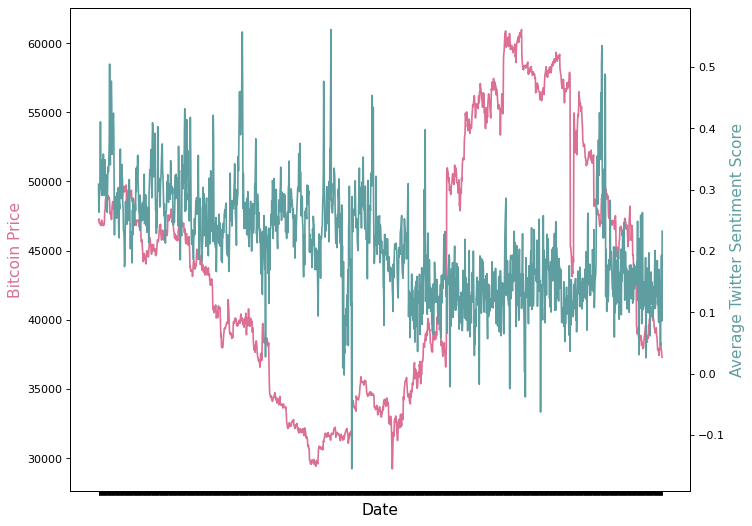

In [11]:
plot_hourly_bitcoin_price(twitter,'compound',bitcoin,'Average Twitter Sentiment Score')

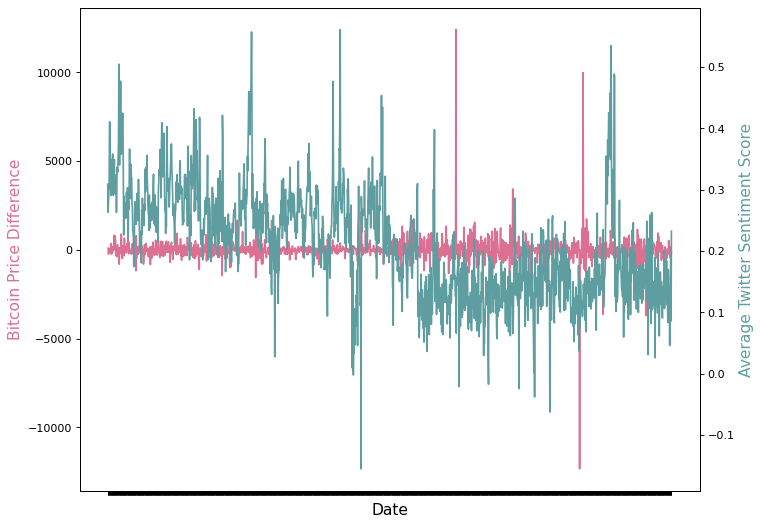

In [12]:
plot_hourly_bitcoin_diff(twitter,'compound',bitcoin,'Average Twitter Sentiment Score')

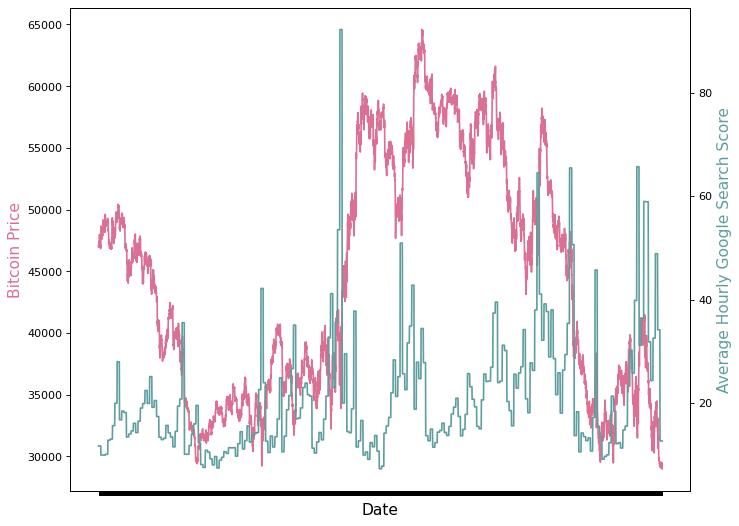

In [ ]:
plot_hourly_bitcoin_price(google,'avg_score',bitcoin,'Average Hourly Google Search Score')

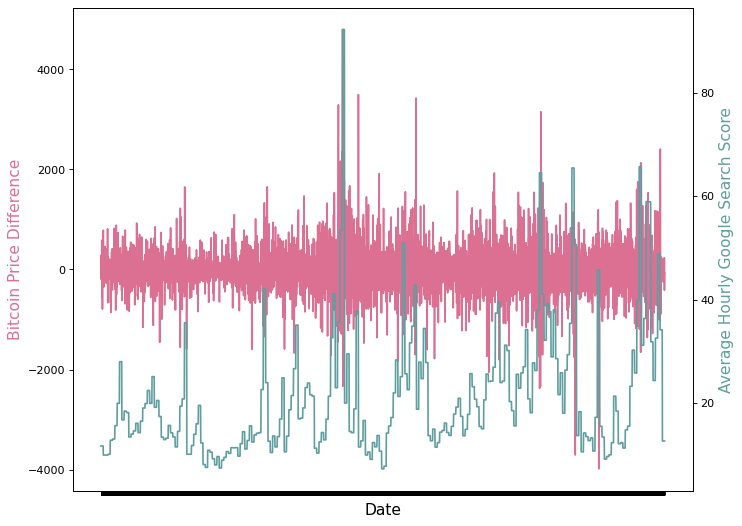

In [ ]:
plot_hourly_bitcoin_diff(google,'avg_score',bitcoin,'Average Hourly Google Search Score')

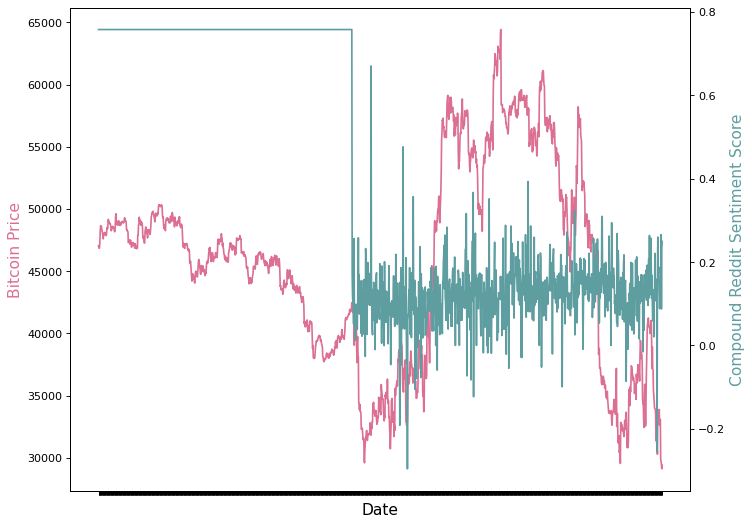

In [ ]:
plot_hourly_bitcoin_price(reddit,'compound',bitcoin,'Compound Reddit Sentiment Score')

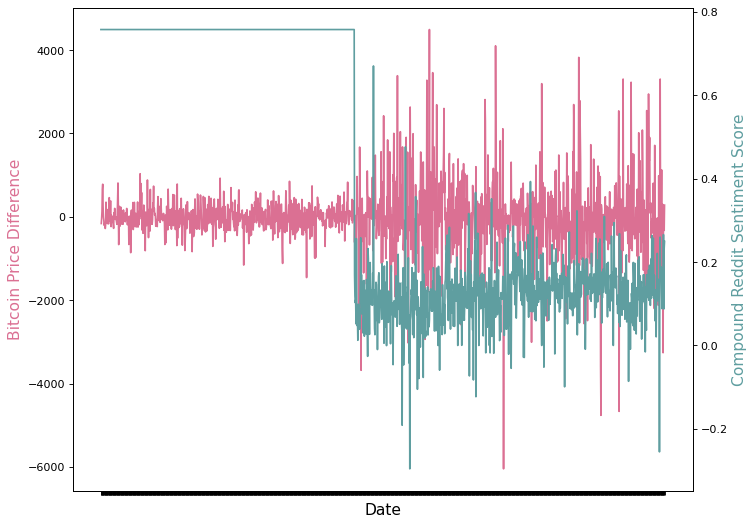

In [ ]:
plot_hourly_bitcoin_diff(reddit,'compound',bitcoin,'Compound Reddit Sentiment Score')

## Granger Causality Analysis

In [13]:
#Reference: https://www.analyticsvidhya.com/blog/2021/08/granger-causality-in-time-series-explained-using-chicken-and-egg-problem/
def check_stationary(timeseries):
  '''
  Checks if a timeseries is stationary or not-- Granger Causality CAN ONLY be performed on stationary timeseries
  '''
  result = adfuller(timeseries)
  print(f'Test Statistics: {result[0]}')
  print(f'p-value: {result[1]}')
  print(f'critical_values: {result[4]}')

  if result[1] > 0.05:
    print("Series is not stationary")
  else:
    print("Series is stationary")

In [14]:
#Reference: https://towardsdatascience.com/a-quick-introduction-on-granger-causality-testing-for-time-series-analysis-7113dc9420d2
maxlag=15
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):   
  '''
  Performs Granger Causation Analysis, to get the causation matrix
  Inputs:
        data: a dataframe consisting of the STATIONARY timeseries that we want to analyse
        variable: names of columns from "data" that we are performing the causality analysis on 
  Outputs: a causation matrix
          The row are the response (y) and the columns are the predictors (x). 
          If a given p-value is < significance level (0.05), we can reject the null hypothesis and conclude that column_x Granger causes column_y.
  ''' 
   
  df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
  for c in df.columns:
    for r in df.index:
      test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
      p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
      if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
      min_p_value = np.min(p_values)
      df.loc[r, c] = min_p_value
  df.columns = [var + '_x' for var in variables]
  df.index = [var + '_y' for var in variables]
  return df

In [ ]:
check_stationary(bitcoin['open'])

Test Statistics: -1.1477162705565833
p-value: 0.6956732039479168
critical_values: {'1%': -3.4314773815268933, '5%': -2.862038195900677, '10%': -2.5670351876718884}
Series is not stationary


In [ ]:
check_stationary(bitcoin['open'].diff().dropna())

Test Statistics: -15.255673586991024
p-value: 4.939503347393972e-28
critical_values: {'1%': -3.4314773815268933, '5%': -2.862038195900677, '10%': -2.5670351876718884}
Series is stationary


In [15]:
check_stationary(twitter['compound'])

Test Statistics: -3.5944336211441845
p-value: 0.005868341011566969
critical_values: {'1%': -3.4337027474693436, '5%': -2.8630210437503014, '10%': -2.5675584476702773}
Series is stationary


In [ ]:
check_stationary(google['avg_score'])

Test Statistics: -6.050035288104425
p-value: 1.2841315890008886e-07
critical_values: {'1%': -3.431476604615945, '5%': -2.8620378526446375, '10%': -2.567035004946881}
Series is stationary


In [ ]:
check_stationary(reddit['compound'])

Test Statistics: -1.0442244505753293
p-value: 0.7367948217483375
critical_values: {'1%': -3.4345978724183603, '5%': -2.863416175501975, '10%': -2.567768846731635}
Series is not stationary


In [ ]:
check_stationary(reddit['compound'].diff().dropna())

Test Statistics: -17.03466383296896
p-value: 8.277864860868821e-30
critical_values: {'1%': -3.4345978724183603, '5%': -2.863416175501975, '10%': -2.567768846731635}
Series is stationary


In [26]:
reddit['compound'] = reddit['compound'].diff().dropna()

In [18]:
#Create Merge granger causality dataframe
granger_df = bitcoin[['date']]
granger_df['bitcoin_diff'] = bitcoin['open'].diff()
granger_df = granger_df.merge(google[['date','avg_score']], on='date')
granger_df = granger_df.merge(twitter[['date','compound']], on='date')
granger_df = granger_df.merge(reddit[['date','compound']], on='date')
granger_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,bitcoin_diff,avg_score,compound_x,compound_y
0,2021-08-26 23:00:00,350.02,13.03125,0.7579,0.308667
1,2021-08-26 22:00:00,85.65,13.03125,0.7579,0.263068
2,2021-08-26 21:00:00,-244.65,13.03125,0.7579,0.281852
3,2021-08-26 19:00:00,70.11,13.03125,0.7579,0.310097
4,2021-08-26 17:00:00,-98.50,13.03125,0.7579,0.410188


In [19]:
grangers_causation_matrix(granger_df, variables = granger_df.columns[1:])

,bitcoin_diff_x,avg_score_x,compound_x_x,compound_y_x
bitcoin_diff_y,1.0000,0.0075,0.0010,0.6644
avg_score_y,0.0000,1.0000,0.0001,0.2258
compound_x_y,0.1794,0.0215,1.0000,0.0404
compound_y_y,0.3763,0.0041,0.0000,1.0000


The row are the response (y) and the columns are the predictors (x). If a given p-value is < significance level (0.05), we can reject the null hypothesis and conclude that metric_x Granger causes metric_y.

**We can hence conclude that Average Twitter Sentiment and Google Search Scores highly granger causes Bitcoin Prices, while compound Reddit sentiment does not granger cause Bitcoin Prices**